In [1]:
using Championetal2023, Plots, SparseArrays

# Figure 5 A
## Code for staircase plots can be found in notebook Figure2.ipynb

# 

  9.297418 seconds (183.82 M allocations: 3.204 GiB, 6.96% gc time, 54.28% compilation time)
  4.201870 seconds (172.03 M allocations: 2.579 GiB, 6.17% gc time)
  3.984933 seconds (172.03 M allocations: 2.579 GiB, 5.96% gc time)


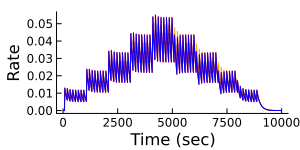

In [2]:
pulseheights = [
    vcat(0.17*[0.7, 1.0, 1.0, 1.0, 1.0], -0.07*[1.0, 1.0, 1.0, 1.0, 1.0]),
    vcat(0.15*[0.7, 1.0, 1.0, 1.0, 1.0], -0.15*[1.0, 1.0, 1.0, 1.0, 1.0]),
    vcat(0.15*[0.7, 1.0, 1.0, 1.0, 1.0], -0.15*[1.0, 1.0, 1.0, 1.0, 1.0]),
]


starts = [100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100]
durations = 100*ones(length(starts))

w_EE_vect = [0.95, 1.05, 1.0]
thisdict = Dict([
        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150.0), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV
        ("nnodes", 1), #1000), #number of network nodes
        ("simtype", :alltoall), #type of simulation

        ("noisesigma", 0.0), #0.01), #0.05), #0.0),
        ("tau_n", 40), #5), #ms
        ("gammasigma", 0.0), #0.0125), #0.0), #0.1), #
        ("tau_n_gamma", 500), #
        ("omegasigma", 0.0), #0.3), #0.5), #
        ("tau_n_omega", 500), #

        # #params for oscillating regime:
        ("gamma_I_t", -0.5), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 5.5), #mS/cm2
        ("I_O", 3.515), #4.035), # #uA/cm2 #4.015), #

        ("pulseheights", 0.0), #0.5), # 3.515), #uA/cm2
        ("pulsestarts", starts), #100), # ms
        ("pulsedurations", durations), #200), # ms

        ("dt", 0.01),
        ("tmax", 10000),
        ("downsamplespacing", 100),

        ])

oscplot_tseries = plot(grid=false, xlabel="Time (sec)", ylabel="Rate", size = (300, 150))
colorvect = [:orange, :red, :blue]


storage = zeros(round(Int64, length(0:thisdict["dt"]:thisdict["tmax"])/thisdict["downsamplespacing"]), length(pulseheights)+1)
for (idx, weight) in enumerate(w_EE_vect)
    thisdict["w_EE"] = weight
    thisdict["pulseheights"] = pulseheights[idx]

    @time tvals, sim = oscintegrator_sim(thisdict)

    plot!(oscplot_tseries, tvals.plot_t_vect, sim.s_vect, legend=false, color=colorvect[idx])

    storage[:,1] = tvals.plot_t_vect/1000
    storage[:,idx+1] = sim.s_vect*1000

end

plot(oscplot_tseries)

# Figure 5D
## These take some time, so I've loaded lower-resolution parameters in below. For higher resolution, increase the length of allstrengths_synval; the paper figures were made with length 250
## To perturb the synapse strength, increase/decrease the value of w_S in the parameter dictionary. 

 12.737728 seconds (515.65 M allocations: 7.762 GiB, 7.57% gc time, 6.13% compilation time)
 11.871023 seconds (514.60 M allocations: 7.704 GiB, 7.92% gc time)
 11.921825 seconds (514.60 M allocations: 7.704 GiB, 8.19% gc time)
 11.943966 seconds (514.60 M allocations: 7.704 GiB, 8.34% gc time)
 12.023046 seconds (514.60 M allocations: 7.704 GiB, 8.61% gc time)
 11.993140 seconds (514.60 M allocations: 7.704 GiB, 8.85% gc time)
 12.101706 seconds (514.60 M allocations: 7.704 GiB, 8.97% gc time)
 11.996630 seconds (514.60 M allocations: 7.704 GiB, 9.12% gc time)
 11.392797 seconds (514.60 M allocations: 7.704 GiB, 6.14% gc time)
 11.167409 seconds (514.60 M allocations: 7.704 GiB, 3.84% gc time)
 11.349156 seconds (514.60 M allocations: 7.704 GiB, 4.39% gc time)


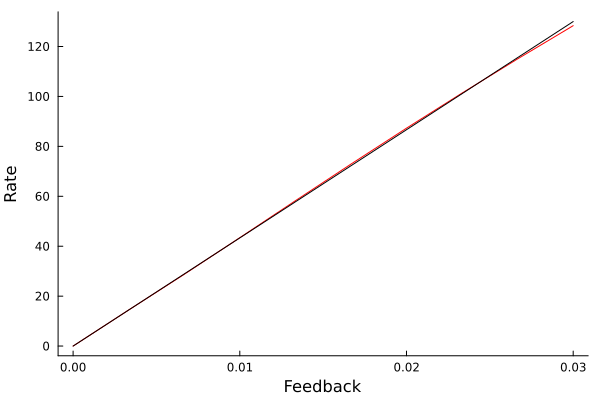

In [3]:
heights = 0.0 
starts = 10 
stops = starts .+ 50

allstrengths_synval = range(0, stop=0.03, length = 10) 

thisdict = Dict([
        ("simtype", :stdystate),
        ("g_L", 0.2), #mS/cm2
        ("E_L", -65.0), #mV
        ("g_Na", 100.0), #mS/cm2
        ("E_Na", 55.0), #mV
        ("g_K", 40.0), #mS/cm2
        ("E_K", -80.0), #mV
        ("g_A", 20.0), #mS/cm2

        ("E_E", 0.0), #mV
        ("E_I", -70.0), #mV
        ("phi", 10.0),
        ("C_m", 1.0), #μF/cm2

        ("w_S", 1.882),
        ("w_O", 3.8),#mS/cm2 
        ("w_E", 0.0), #mS/cm2
        ("w_I", 0.0), #mS/cm2

        ("synapseactivity", 0.0), #mS/cm2

        ("theta_s", -20.0), #μF/cm2
        ("sigma_s", 2.0), #μF/cm2
        ("alpha_s", 1.0), #μF/cm2

        ("tau_S", 100.0), #ms
        ("tau_O", 100.0), #ms
        ("tau_E", 5.0), #ms
        ("tau_I", 5.0), #ms
        ("tau_A", 20.0), #ms

        ("spike_threshold", 20.0), # mV

        ("noisesigma", 0.0), 
        ("tau_n", 40), #5), #ms
        ("gammasigma", 0.0),
        ("tau_n_gamma", 500), 
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500),

        ("I_app_O", 3.0), #uA/cm2
        ("I_app_E", 0.0), #uA/cm2
        ("I_app_I", 0.0), #uA/cm2

        ("gamma_I_t", 0.0), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("I_O", 0.0),  #uA/cm2

        ("pulseheights", heights), #uA/cm2
        ("pulsestarts", starts), # ms
        ("pulsestops", stops), # ms

        ("dt", 0.002),
        ("tmax", 4000), 
        ("downsamplespacing", 10),
        ])

allstrengths = allstrengths_synval 
ratestorage = zeros(length(allstrengths))
for (i, synapsestrength) in enumerate(allstrengths)
    thisdict["synapseactivity"] = synapsestrength
    @time tvals, sim = seungautapse_sim(thisdict)

    tempspikes = nonzeros(sim.spikes_vect)
    if length(tempspikes)>2
        midpoint = round(Int64, length(tempspikes)/2)
        ratestorage[i] = (length(tempspikes) - midpoint)/(tempspikes[end]/1000 - tempspikes[midpoint]/1000)
    else
        ratestorage[i] = 0.0 
    end

end

@time tvals, sim = seungautapse_sim(thisdict)


bifplot = plot(xlabel="Feedback", ylabel="Rate",grid=false, legend=false)
plot!(bifplot, allstrengths_synval, ratestorage, color=:red)
plot!(bifplot, allstrengths_synval, range(0, stop=130, length=length(allstrengths_synval)), color=:black)
plot(bifplot)



# Figure 5C

In [4]:


pulseheights = vcat(0.8*ones(5), -0.6*ones(5))
starts = [100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100]
w_S_vect = [0.95*1.882, 1.05*1.882, 1.882]
stops = starts .+ 50

thisdict = Dict([
        ("simtype", :simple),
        ("g_L", 0.2), #mS/cm2
        ("E_L", -65.0), #mV
        ("g_Na", 100.0), #mS/cm2
        ("E_Na", 55.0), #mV
        ("g_K", 40.0), #mS/cm2
        ("E_K", -80.0), #mV
        ("g_A", 20.0), #mS/cm2

        ("E_E", 0.0), #mV
        ("E_I", -70.0), #mV
        ("phi", 10.0),
        ("C_m", 1.0), #μF/cm2

        ("w_S", 1.882), #mS/cm2 
        ("w_O", 3.8), #mS/cm2 
        ("w_E", 0.0), #mS/cm2
        ("w_I", 0.0), #mS/cm2

        ("theta_s", -20.0), #μF/cm2
        ("sigma_s", 2.0), #μF/cm2
        ("alpha_s", 1.0), #μF/cm2

        ("tau_S", 100.0), #ms
        ("tau_O", 100.0), #ms
        ("tau_E", 5.0), #ms
        ("tau_I", 5.0), #ms
        ("tau_A", 20.0), #ms

        ("spike_threshold", 20.0), # mV

        ("noisesigma", 0.0), 
        ("tau_n", 40), 
        ("gammasigma", 0.0), 
        ("tau_n_gamma", 500), 
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500), 

        ("I_app_O", 3.0), #uA/cm2
        ("I_app_E", 0.0), #uA/cm2
        ("I_app_I", 0.0), #uA/cm2

        ("gamma_I_t", 0.0), #uA/cm2
        ("omega_I_t", 0.05), #1/ms
        ("I_O", 0.0),  #uA/cm2

        ("pulseheights", pulseheights), #uA/cm2
        ("pulsestarts", starts), # ms
        ("pulsestops", stops), # ms

        ("dt", 0.002),
        ("tmax", 10000),
        ("downsamplespacing", 100),
        ])


SAM_tseries = plot(grid=false, xlabel="Time (sec)", ylabel="Rate", size = (300, 150))
colorvect = [:orange, :red, :blue]


SAMstorage = zeros(round(Int64, length(0:thisdict["dt"]:thisdict["tmax"])/thisdict["downsamplespacing"]), length(w_S_vect)+1)
for (idx, weight) in enumerate(w_S_vect)
    thisdict["w_S"] = weight
    thisdict["pulseheights"] = pulseheights 

    @time tvals, sim, filteredrate = seungautapse_sim(thisdict)
    plot!(SAM_tseries, tvals.plot_t_vect/1000, filteredrate, legend=false, color=colorvect[idx])


    SAMstorage[:,1] = tvals.plot_t_vect/1000
    SAMstorage[:,idx+1] = filteredrate

end

plot(SAM_tseries)


 30.093961 seconds (1.37 G allocations: 20.438 GiB, 4.92% gc time, 0.34% compilation time)
 30.399044 seconds (1.37 G allocations: 20.419 GiB, 5.09% gc time)
 30.251234 seconds (1.37 G allocations: 20.419 GiB, 5.27% gc time)
